In [1]:
import os
import pandas as pd
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
os.chdir(os.path.join(os.getcwd(), "data"));

In [3]:
random_state = np.random.seed(24)

In [4]:
df = pd.read_csv("2018-19-gw-data-preprocessed.csv", index_col=False);

In [5]:
df.dtypes

player_id                                   int64
was_home                                    int64
ict_index                                 float64
ict_index_pgw                             float64
influence                                 float64
influence_pgw                             float64
threat                                    float64
threat_pgw                                float64
creativity                                float64
creativity_pgw                            float64
assists_pgw                               float64
attempted_passes_pgw                      float64
big_chances_created_pgw                   float64
big_chances_missed_pgw                    float64
bonus_pgw                                 float64
bps_pgw                                   float64
clean_sheets_pgw                          float64
clearances_blocks_interceptions_pgw       float64
completed_passes_pgw                      float64
dribbles_pgw                              float64


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
player_id,21790.0,288.004635,166.909050,1.0,144.0,287.0,431.0,624.0
was_home,21790.0,0.500092,0.500011,0.0,0.0,1.0,1.0,1.0
ict_index,21790.0,1.880725,3.140463,0.0,0.0,0.0,2.8,25.8
ict_index_pgw,21790.0,1.826888,3.103382,0.0,0.0,0.0,2.7,25.8
influence,21790.0,7.916549,13.391827,0.0,0.0,0.0,12.4,116.6
influence_pgw,21790.0,7.694364,13.247205,0.0,0.0,0.0,12.0,116.6
threat,21790.0,5.769436,13.946782,0.0,0.0,0.0,3.0,151.0
threat_pgw,21790.0,5.593942,13.723704,0.0,0.0,0.0,2.0,151.0
creativity,21790.0,5.132455,11.102271,0.0,0.0,0.0,3.5,134.8
creativity_pgw,21790.0,4.991868,10.975612,0.0,0.0,0.0,3.2,134.8


In [7]:
X = df.loc[:, df.columns != "total_points"];
y = df.loc[:, df.columns == "total_points"];

In [8]:
# X.drop(["player_id"], inplace=True, axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, 
                                                    random_state=random_state)
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, 
#                                                   test_size=0.50, 
#                                                   random_state=random_state)

In [10]:
scaler = MinMaxScaler()

In [11]:
X_train_scaled = scaler.fit_transform(X_train)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [12]:
print("X train shape: ", X_train.shape)
print("y train shape: ", y_train.shape)

X train shape:  (18521, 59)
y train shape:  (18521, 1)


In [13]:
print("X test shape: ", X_test.shape)
print("y test shape: ", y_test.shape)

X test shape:  (3269, 59)
y test shape:  (3269, 1)


In [14]:
y_true = np.array(y_test["total_points"]);

In [15]:
y_true

array([0, 2, 2, ..., 0, 1, 5])

In [16]:
def create_mlp(dim, dropout=0.1, regress=False):
    # define our MLP network
    model = Sequential()
    model.add(Dense(1024, input_dim=dim, activation="relu"))
    model.add(Dropout(dropout));
    model.add(Dense(512, input_dim=dim, activation="relu"))
    model.add(Dropout(dropout));
    model.add(Dense(256, input_dim=dim, activation="relu"))
    model.add(Dropout(dropout));
    model.add(Dense(128, input_dim=dim, activation="relu"))
    model.add(Dropout(dropout));
 
    # check to see if the regression node should be added
    if regress:
        model.add(Dense(1, activation="linear"))
 
    # return our model
    return model

In [17]:
model = create_mlp(X_train.shape[1], dropout=0.4, regress=True)
opt = keras.optimizers.Adam(lr=0.00001, decay=1e-6)
model.compile(loss="mean_squared_error", optimizer=opt);

W0818 19:37:09.562145 4574537152 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 19:37:09.576992 4574537152 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 19:37:09.579644 4574537152 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 19:37:09.591337 4574537152 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0818 19:37:09.599102 4574537152 deprecati

In [18]:
es = keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=15,
                              verbose=0, mode='auto')

In [19]:
history = model.fit(X_train_scaled, y_train, validation_split=0.15, epochs=200, shuffle=True, 
          batch_size=64, callbacks=[es], verbose=1)

W0818 19:37:09.948724 4574537152 deprecation_wrapper.py:119] From /usr/local/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15742 samples, validate on 2779 samples
Epoch 1/200
15742/15742 [==============================] - 5s 320us/step - loss: 7.3055 - val_loss: 6.6539
Epoch 2/200
15742/15742 [==============================] - 4s 277us/step - loss: 5.8290 - val_loss: 5.5223
Epoch 3/200
15742/15742 [==============================] - 4s 277us/step - loss: 5.2384 - val_loss: 5.1081
Epoch 4/200
15742/15742 [==============================] - 4s 277us/step - loss: 4.9219 - val_loss: 4.7743
Epoch 5/200
15742/15742 [==============================] - 4s 281us/step - loss: 4.6083 - val_loss: 4.4509
Epoch 6/200
15742/15742 [==============================] - 4s 281us/step - loss: 4.2691 - val_loss: 4.1285
Epoch 7/200
15742/15742 [==============================] - 4s 281us/step - loss: 4.0330 - val_loss: 3.7972
Epoch 8/200
15742/15742 [==============================] - 4s 264us/step - loss: 3.6641 - val_loss: 3.4437
Epoch 9/200
15742/15742 [==============================] - 5s 287us/step - loss: 3.3835 - val_l

15742/15742 [==============================] - 3s 193us/step - loss: 1.8857 - val_loss: 2.0143
Epoch 77/200
15742/15742 [==============================] - 3s 192us/step - loss: 1.8942 - val_loss: 2.0039
Epoch 78/200
15742/15742 [==============================] - 3s 176us/step - loss: 1.8833 - val_loss: 2.0008
Epoch 79/200
15742/15742 [==============================] - 3s 186us/step - loss: 1.8934 - val_loss: 2.0045
Epoch 80/200
15742/15742 [==============================] - 3s 193us/step - loss: 1.8842 - val_loss: 2.0062
Epoch 81/200
15742/15742 [==============================] - 3s 188us/step - loss: 1.8923 - val_loss: 1.9817
Epoch 82/200
15742/15742 [==============================] - 3s 180us/step - loss: 1.8745 - val_loss: 1.9967
Epoch 83/200
15742/15742 [==============================] - 3s 190us/step - loss: 1.8461 - val_loss: 2.0286
Epoch 84/200
15742/15742 [==============================] - 3s 189us/step - loss: 1.8681 - val_loss: 2.0164
Epoch 85/200
15742/15742 [===============

In [20]:
X_test_scaled = scaler.transform(X_test)

In [21]:
y_predicted = model.predict(X_test_scaled)

In [23]:
y_predicted

[0,
 4,
 1,
 0,
 1,
 4,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 3,
 7,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 6,
 1,
 0,
 0,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 7,
 0,
 0,
 0,
 0,
 4,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 1,
 4,
 1,
 1,
 6,
 0,
 1,
 0,
 2,
 0,
 5,
 0,
 0,
 3,
 4,
 1,
 0,
 3,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 9,
 0,
 1,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 3,
 4,
 0,
 0,
 5,
 9,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 5,
 2,
 0,
 10,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 13,
 0,
 1,
 2,
 0,
 0,
 6,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 5,
 0,
 12,
 0,
 3,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 7,
 5,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 7,
 0,
 

In [24]:
y_true

array([0, 2, 2, ..., 0, 1, 5])

In [25]:
metrics.mean_squared_error(y_true, y_predicted)

2.45610278372591

In [26]:
metrics.r2_score(y_true, y_predicted)

0.6375303458602923

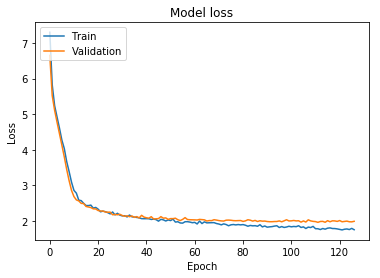

In [27]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()